
image 1/1 d:\downloads\NewAndEnhancedWork2\Fine9.jpeg: 800x480 1 paper-document-, 67.8ms
Speed: 7.0ms preprocess, 67.8ms inference, 164.6ms postprocess per image at shape (1, 3, 800, 480)


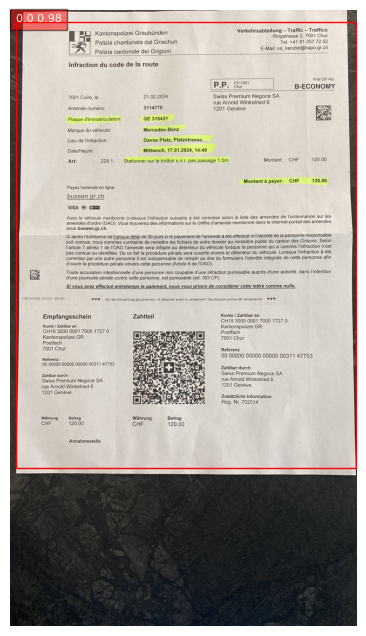

Annotated image saved as: Fine8_annotated.jpeg


In [2]:
from ultralytics import YOLO
import torch  # Import torch to call .cpu() on tensors
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load your model
model = YOLO('D:/downloads/NewAndEnhancedWork2/runs/detect/train8/weights/best.pt')

# Run prediction
image_path = 'Fine9.jpeg'
results = model(image_path)

# Assuming that the first item in results contains the detections
detections = results[0].boxes

# Load your image
img = Image.open(image_path)
plt.figure(figsize=(12, 8))
plt.imshow(img)

for det in detections:
    # Access the attributes of each detection
    # Ensure that the tensor is moved to CPU before converting to numpy
    xmin, ymin, xmax, ymax = det.xyxy[0].cpu().numpy()
    conf = det.conf.item()  # Convert to standard Python number using .item()
    cls = det.cls.item()  # Convert to standard Python number using .item()

    # Create a rectangle patch and add it to the plot
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor="r", facecolor="none", label=f"Class ID: {cls}")
    plt.gca().add_patch(rect)
    # Use standard Python formatting syntax
    plt.text(xmin, ymin, f"{cls} {conf:.2f}", color="white", fontsize=8, bbox=dict(facecolor='red', alpha=0.5))
# Hide axis
plt.axis('off')

# Save the resulting plot with the bounding boxes to a file
output_path = 'Fine8_annotated.jpeg'
plt.savefig(output_path)

# Show the plot with bounding boxes
plt.show()

print(f"Annotated image saved as: {output_path}")


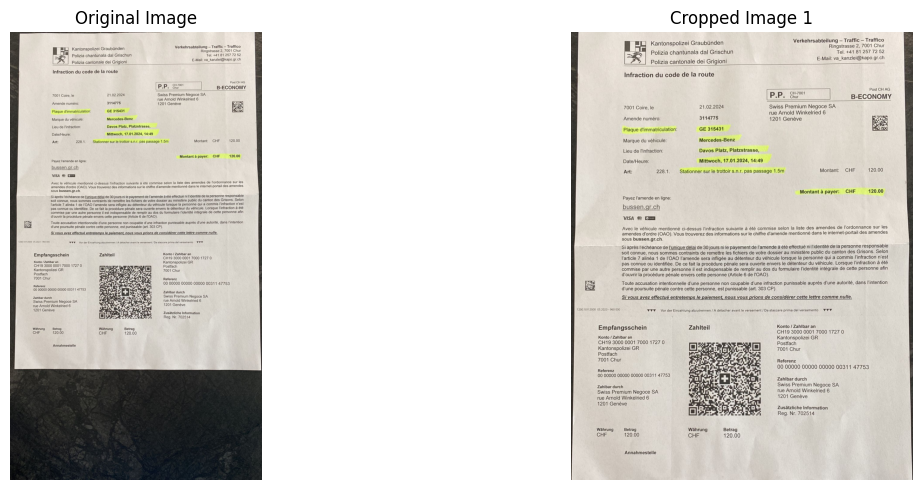

In [3]:
# Create a subplot grid for displaying the original image and cropped images
plt.figure(figsize=(15, 5))

# Display the original image
plt.subplot(1, len(detections) + 1, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Iterate through each detection
for det_index, det in enumerate(detections):
    # Access the attributes of each detection
    xmin, ymin, xmax, ymax = det.xyxy[0].cpu().numpy()
    
    # Crop the image based on bounding box coordinates
    cropped_img = img.crop((xmin, ymin, xmax, ymax))
    
    # Display the cropped image
    plt.subplot(1, len(detections) + 1, det_index + 2)
    plt.imshow(cropped_img)
    plt.title(f'Cropped Image {det_index + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()
